In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [88]:
week_days_path = "./data/paris_weekdays_district.csv"
week_ends_path = "./data/paris_weekends_district.csv"

paris_weekdays = pd.read_csv(week_days_path, index_col=0)
paris_weekends = pd.read_csv(week_ends_path, index_col=0)

paris_weekdays['is_weekend'] = 0
paris_weekends['is_weekend'] = 1

paris_all = pd.concat([paris_weekdays, paris_weekends], ignore_index=True)
paris_all = paris_all[paris_all['district'] != 0]

print("Shape of combined dataset:", paris_all.shape)

Shape of combined dataset: (6114, 21)


In [89]:
selected_columns = [
    'guest_satisfaction_overall',
    'dist',
    'realSum',
    "attr_index_norm",
    "metro_dist",
    "person_capacity",
]

In [90]:
def remove_outliers(data, columns):
    filtered_data = data.copy()

    for col in columns:
        Q1 = filtered_data[col].quantile(0.25)
        Q3 = filtered_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        filtered_data = filtered_data[(filtered_data[col] >= lower_bound) & (filtered_data[col] <= upper_bound)]

    removed_count = len(data) - len(filtered_data)
    print(f"Removed {removed_count} outliers ({removed_count/len(data)*100:.2f}%)")
    print(f"Remaining data: {len(filtered_data)} rows")

    return filtered_data

paris_all_clean = remove_outliers(paris_all, selected_columns)

Removed 240 outliers (3.93%)
Remaining data: 5874 rows


Combined dataset after standardization:
       guest_satisfaction_overall          dist       realSum  \
count                5.874000e+03  5.874000e+03  5.874000e+03   
mean                -4.838561e-17  9.677123e-17 -1.935425e-17   
std                  1.000085e+00  1.000085e+00  1.000085e+00   
min                 -4.273875e+00 -1.978653e+00 -1.466630e+00   
25%                 -5.238633e-01 -7.877554e-01 -6.885742e-01   
50%                  1.972928e-01 -9.626608e-03 -2.818078e-01   
75%                  7.742176e-01  7.188060e-01  4.442551e-01   
max                  1.062680e+00  3.256397e+00  4.099648e+00   

       attr_index_norm    metro_dist  person_capacity  
count     5.874000e+03  5.874000e+03     5.874000e+03  
mean      1.161255e-16 -2.370895e-16    -1.397135e-16  
std       1.000085e+00  1.000085e+00     1.000085e+00  
min      -1.500155e+00 -1.966022e+00    -7.826469e-01  
25%      -7.390452e-01 -7.128901e-01    -7.826469e-01  
50%      -2.147583e-01 -1.394803e-01  

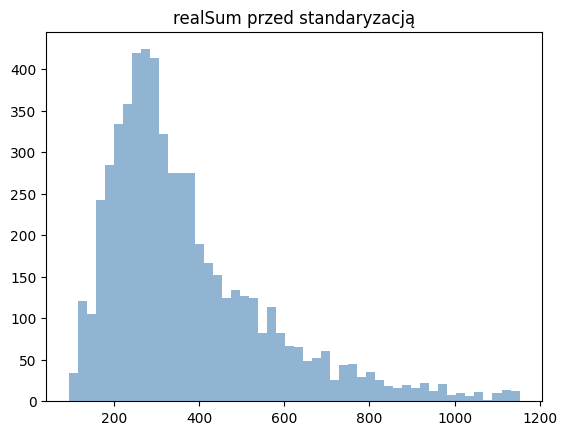

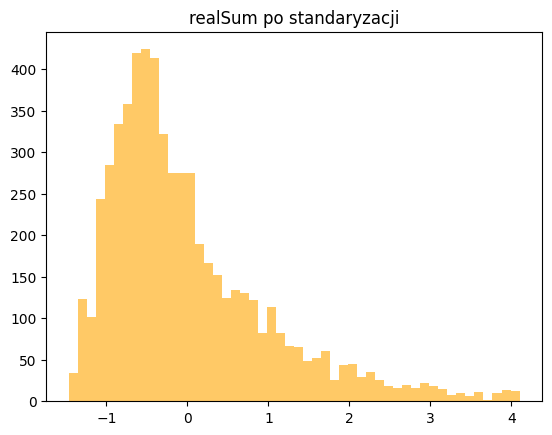

In [91]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
paris_all_std = paris_all_clean.copy()
paris_all_std[selected_columns] = scaler.fit_transform(paris_all_clean[selected_columns])

print("Combined dataset after standardization:")
print(paris_all_std[selected_columns].describe())

plt.hist(paris_all_clean['realSum'], bins=50, alpha=0.6, color='steelblue')
plt.title("realSum przed standaryzacją")
plt.show()

plt.hist(paris_all_std['realSum'], bins=50, alpha=0.6, color='orange')
plt.title("realSum po standaryzacji")
plt.show()

# Klasyfikacja Dzielnica

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Multiclass District Classification Results:
Accuracy: 0.5932

Classification Report:
              precision    recall  f1-score   support

           1       0.18      0.11      0.14        27
           2       0.63      0.57      0.60        56
           3       0.77      0.95      0.85        77
           4       0.86      0.83      0.85        36
           5       0.26      0.14      0.18        42
           6       0.44      0.49      0.46        43
           7       0.58      0.52      0.55        29
           8       0.64      0.56      0.60        50
           9       0.62      0.66      0.64        77
          10       0.71      0.64      0.68        76
          11       0.65      0.89      0.76       114
          12       0.10      0.05      0.07        39
          13       0.22      0.06      0.09        35
          14       0.73      0.50      0.59        44
          15       0.43      0.38      0.40        60
          16       0.83      0.99      0.90       

/home/washindeiru/.venv/md/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


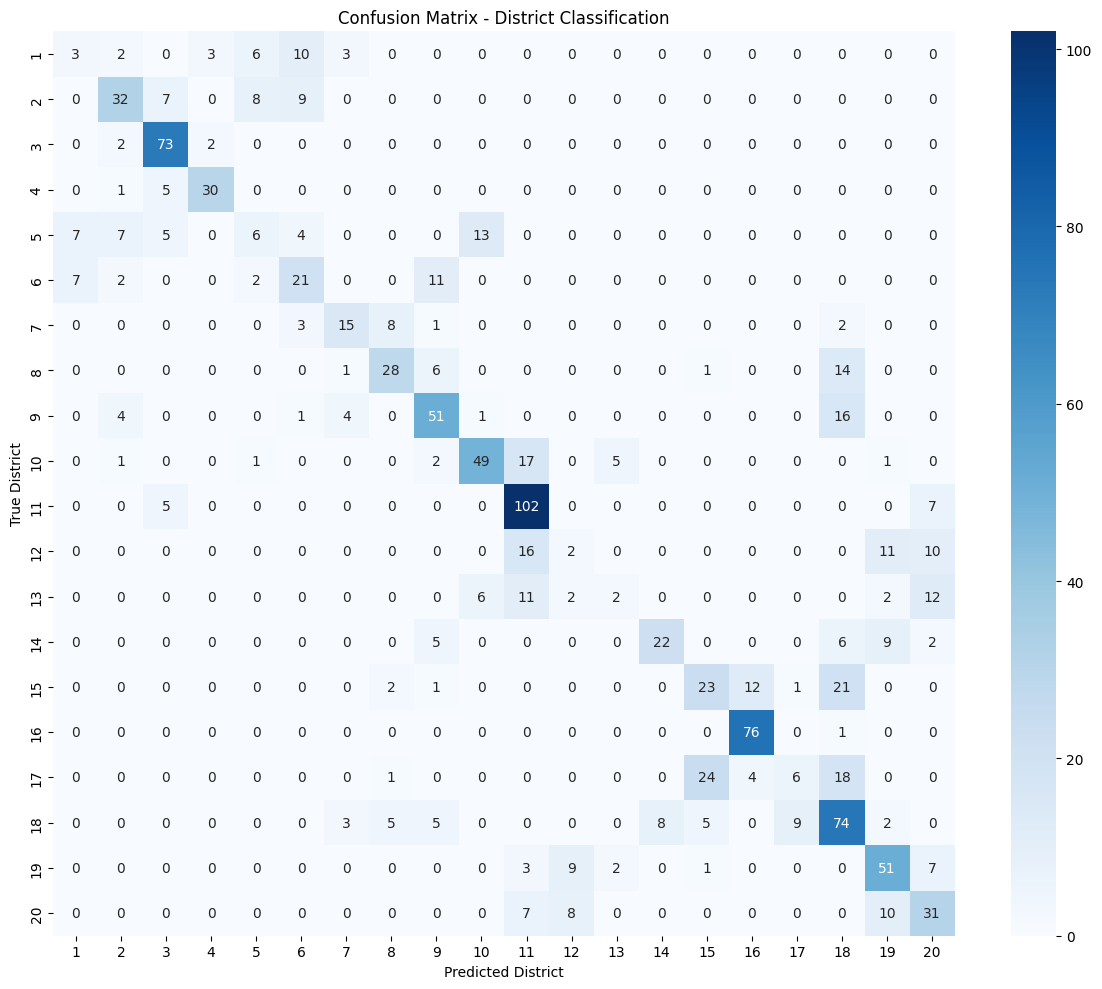


Feature Coefficients by District:
             guest_satisfaction_overall       dist   realSum  attr_index_norm  \
District 1                     0.103184  -2.193935  0.114785         4.560315   
District 2                    -0.074848  -2.988184  0.043351         2.868037   
District 3                    -0.188598 -10.355365  0.229274        -0.606164   
District 4                    -0.076467 -10.911920  0.102199         1.899479   
District 5                     0.002496  -3.025509 -0.223109         3.052096   
District 6                    -0.044655  -0.998127  0.213037         4.360854   
District 7                    -0.166373   3.383045  0.149306         5.529978   
District 8                    -0.125342   5.508493  0.368317         4.722457   
District 9                     0.005325   0.910220  0.038208         2.842938   
District 10                   -0.013641  -2.121255 -0.158773        -1.773515   
District 11                    0.340425  -8.356192 -0.118031       -10.811

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

X = paris_all_clean[selected_columns]
y = paris_all_clean['district']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42, max_iter=1000, multi_class='multinomial')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Multiclass District Classification Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.xlabel('Predicted District')
plt.ylabel('True District')
plt.title('Confusion Matrix - District Classification')
plt.tight_layout()
plt.show()

print("\nFeature Coefficients by District:")
coef_df = pd.DataFrame(
    model.coef_,
    columns=selected_columns,
    index=[f'District {i}' for i in sorted(y.unique())]
)
print(coef_df)